# Demonstration of SplitWavePy using microseismic data

Import statements.

In [1]:

import splitwavepy as sw
from obspy import read

# ignore warnings in this demo
import warnings
warnings.filterwarnings('ignore')

I have some data stored on disk in SAC format, use obspy to read it in.

In [25]:
# OBSPY
datahome = '/Users/glyjw/Data/demo_Baird_2017/'
st = read(datahome + 'example.?')

Have a look at the data.

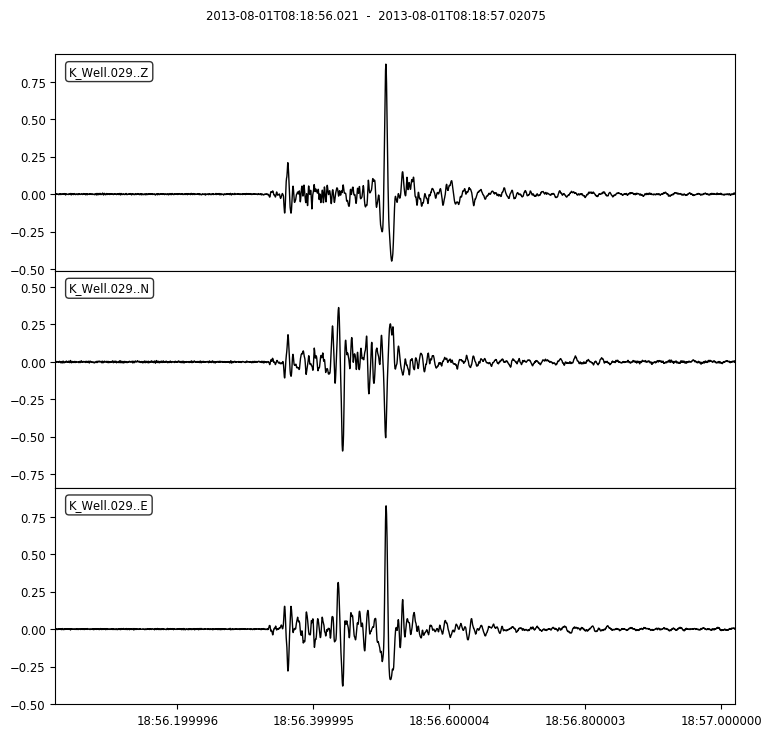

In [18]:
# OBSPY
st.plot()

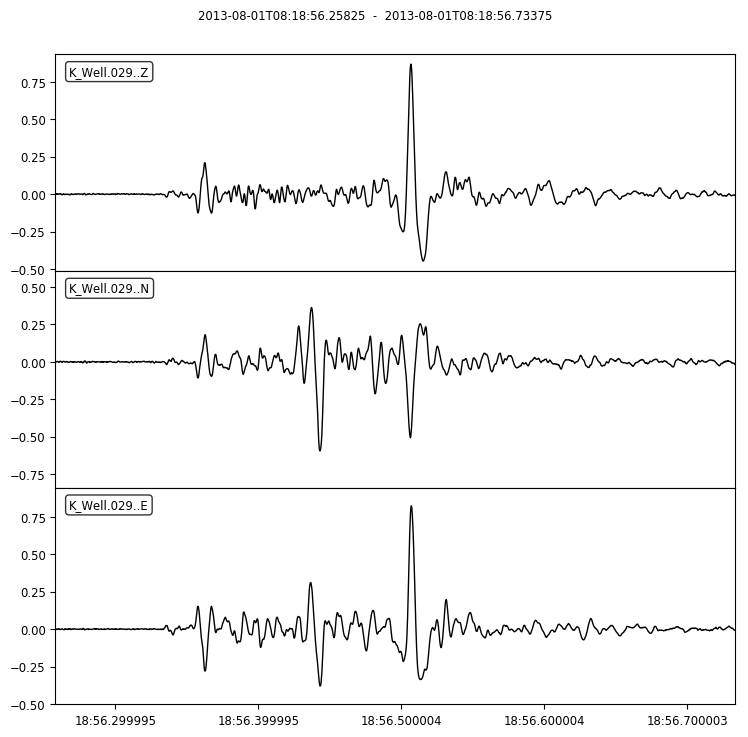

In [32]:
st = read(datahome + 'example.?')
delta = st[0].stats.delta
a=st[0].stats.starttime + st[0].stats.sac['t0']-0.4
b=st[0].stats.starttime + st[0].stats.sac['t1']+delta
st.trim(a,b)
st.plot()

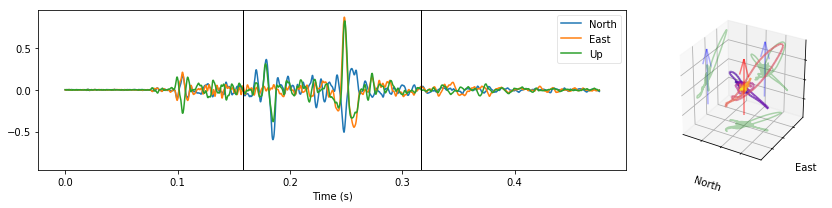

In [33]:
t = sw.Trio(st[1].data,st[2].data, st[0].data,delta=delta)
# t.set_window(0.04,0.07)
# t.p_rotate()
t.plot()

In [37]:
for tr in st:
    st.write(datahome + tr.id, format='SAC')

In [36]:
st[0].id

'K_Well.029..E'

In [38]:
for tr in st:
    print(tr.id)

K_Well.029..E
K_Well.029..N
K_Well.029..Z


In [41]:
gy = read(datahome + 'K_Well.029.*.?')

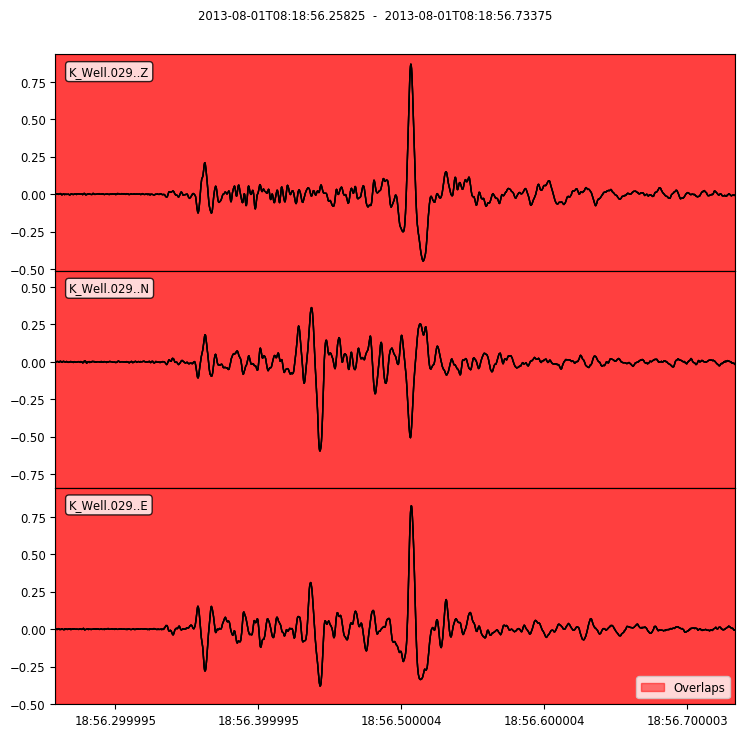

In [42]:
gy.plot()

In [57]:
st.write(datahome + 'toshow', format = 'SAC' )

In [58]:
gy = read(datahome + 'toshow*')

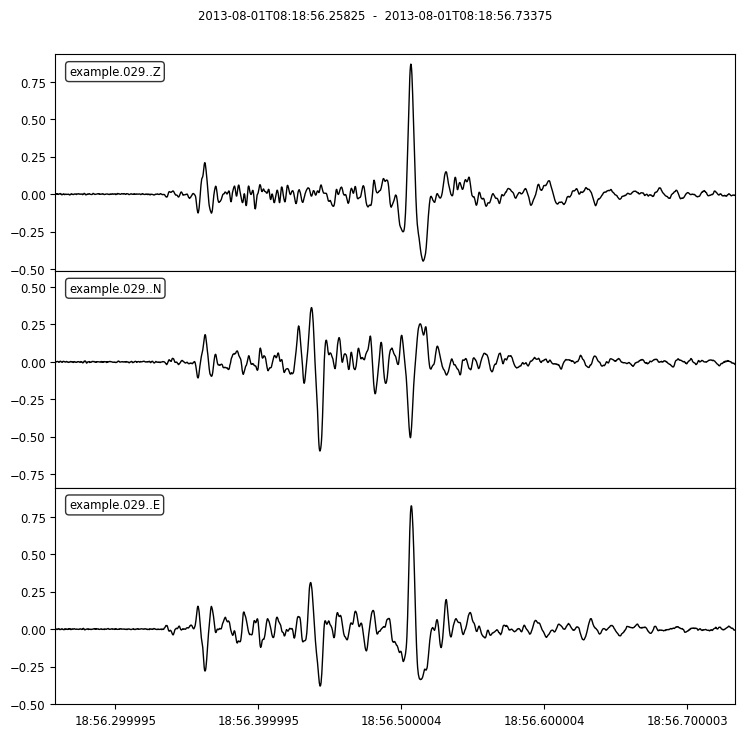

In [59]:
gy.plot()

In [55]:
st[2].stats.network = 'example'

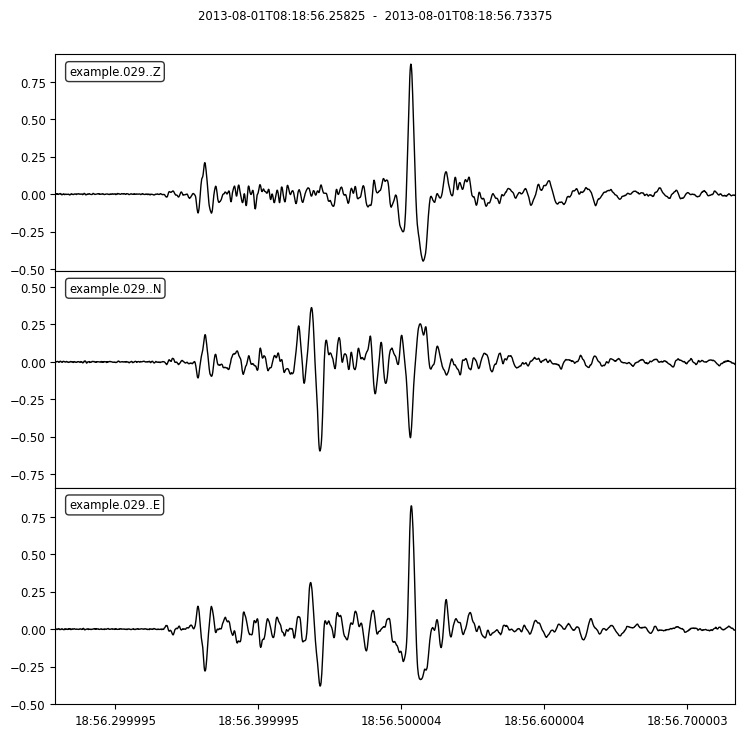

In [56]:
st.plot()